In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
class Particle:
    def __init__(self, tau_life, tau_bond):
        self.tau_life = tau_life
        self.tau_bond = tau_bond
        self.t = 0
        self.BondedTo = 0
        
    def tick(self):
        self.t += 1
        
    def checkLife(self):
        if self.t >= self.tau_life:
            return True
        return False
    
    def checkLifeBond(self):
        if self.t >= self.tau_bond:
            return True
        return False
    
    

In [68]:
class Enzyme:
    def __init__(self):
        self.free = True
        
    def checkFree(self):
        return self.free
    

In [520]:
def run(In_rate, tau_life, tau_bond, nEnz, timeStep):

    preBondList = []
    bondList = []
    afterBondList = []

    freeEnzList = []
    nonFreeEnzList = []


    

    n_circle = 0
    n_square = 0

    finalCircleList = []
    finalSquareList = []

    for j in range(nEnz):
        freeEnzList.append(Enzyme())

    for i in range(timeStep):
        
        

        ## adding new elements
        for elem in range(In_rate):
            newParticle = Particle(tau_life, tau_bond)
            newParticle.t = np.random.randint(min([tau_life, tau_bond]))*1
            preBondList.append(newParticle)

        ## Possible bindings to enzymes

        if len(preBondList) == 0 or len(freeEnzList) == 0:
            ## tick and pass check
            for i, elem in enumerate(preBondList):
                elem.tick()
                if elem.checkLife():
                    preBondList.pop(i)
                    n_circle += 1


            ## tick and debond check
            for i, elem in enumerate(bondList):
                elem.tick()
                if elem.checkLifeBond():
                    bondList.pop(i)
                    enz = nonFreeEnzList.pop()
                    freeEnzList.append(enz)
                    n_square += 1
            
            N_total = n_circle+n_square
            finalCircleList.append(n_circle/(N_total+1)*0 + n_circle)
            finalSquareList.append(n_square/(N_total+1)*0 + n_square)

            continue

        bindingNumber = np.random.randint(len(preBondList)) + 1

        for item in range(bindingNumber):
            
            if len(preBondList) == 0 or len(freeEnzList) == 0:
                break

            elemID = np.random.randint(len(preBondList))
            enzID = np.random.randint(len(freeEnzList))

            elem = preBondList.pop(elemID)
            enz = freeEnzList.pop(enzID)


            elem.BondedTo = enz
            elem.t = 0
            bondList.append(elem)
            nonFreeEnzList.append(enz)

        ## tick and pass check
        for i, elem in enumerate(preBondList):
            elem.tick()
            if elem.checkLife():
                preBondList.pop(i)
                n_circle += 1



        ## tick and debond check
        for i, elem in enumerate(bondList):
            elem.tick()
            if elem.checkLifeBond():
                bondList.pop(i)
                enz = nonFreeEnzList.pop()
                freeEnzList.append(enz)
                n_square += 1

        N_total = n_circle+n_square
        finalCircleList.append(n_circle/(N_total+1)*0 + n_circle)
        finalSquareList.append(n_square/(N_total+1)*0 + n_square)

    
    return finalCircleList, finalSquareList

 

            

            
        
 
    
        

In [588]:
# For Dampped oscillation
# In_rate = 40
# tau_life = 50
# tau_bond = 100
# timeStep = 1000
# nEnz = 150
# finalCircleList, finalSquareList = run(In_rate, tau_life, tau_bond, nEnz, timeStep)



In_rate = 2
tau_life = 60
tau_bond = 40
nEnz = 50

timeStep = 1000
finalCircleList, finalSquareList = run(In_rate, tau_life, tau_bond, nEnz, timeStep)
finalCircleList = np.array(finalCircleList)
finalSquareList = np.array(finalSquareList)
total = finalCircleList + finalSquareList+1

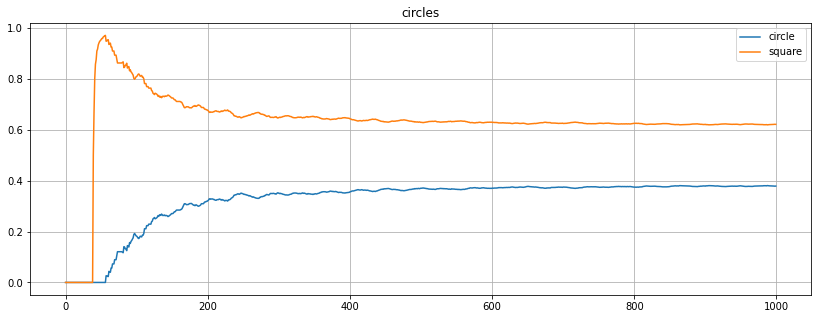

In [589]:
plt.figure(figsize=(14,5))
#plt.plot(finalCircleList)
plt.plot(finalCircleList/total, label='circle')
plt.plot(finalSquareList/total, label='square')
plt.legend()
plt.title("circles")
#plt.xlim(0,100)
plt.grid()

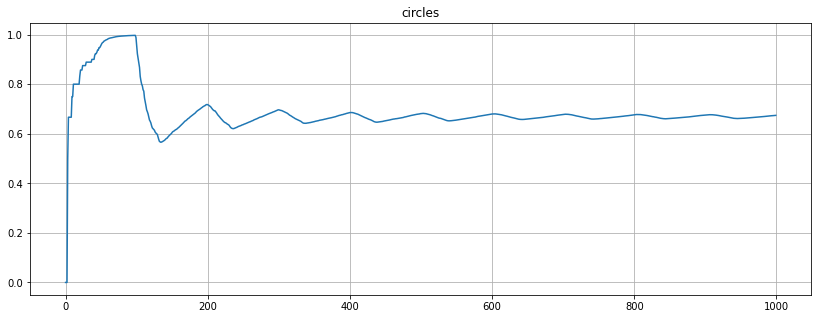

In [535]:
plt.figure(figsize=(14,5))
#plt.plot(finalCircleList)
plt.plot(finalCircleList/total)
plt.title("circles")
#plt.xlim(0,100)
plt.grid()

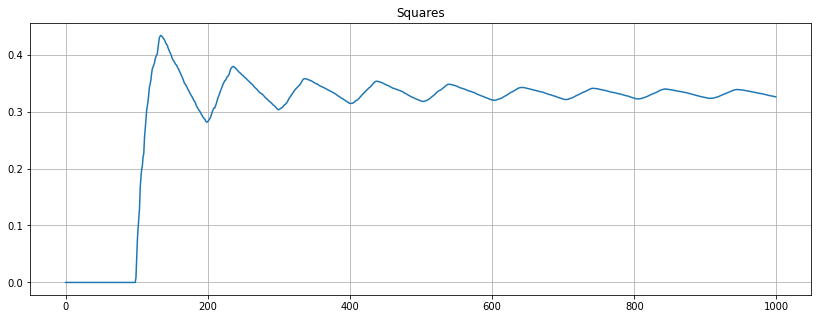

In [536]:
plt.figure(figsize=(14,5))
#plt.plot(finalSquareList)
plt.plot(finalSquareList/total)
plt.title('Squares')
plt.grid()

In [515]:
nEnzList = np.arange(15,35)
finalCircle = []
finalSquare = []
nEns = 20

for nEnz in nEnzList:
    circle = 0
    square = 0
    for ens in range(nEns):
        finalCircleList, finalSquareList = run(In_rate, tau_life, tau_bond, nEnz, timeStep)
        circle += finalCircleList[-1]/nEns
        square += finalSquareList[-1]/nEns
    finalCircle.append(circle)
    finalSquare.append(square)

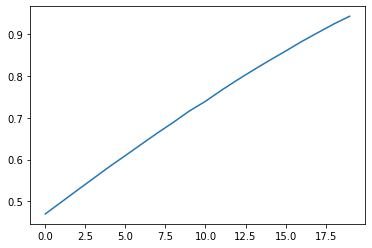

In [358]:
plt.plot(finalSquare)

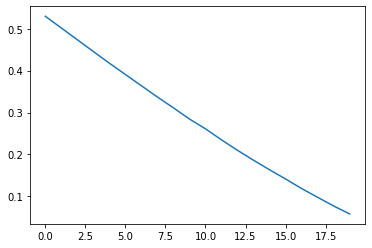

In [359]:
plt.plot(finalCircle)

In [386]:
min([tau_life, tau_bond])

20

In [764]:
P_free = 0.3


p = 1
q = 1

alpha = P_free*p
beta = (1-P_free)*q
tau = 50
gamma = 1/tau
P_in = 0
P_out_c = 0
P_out_s = 0

const = 10

dt = 0.01
step = 15000


P_inList = []
alphaList = []
betaList = []
P_freeList = []
P_out_cList = []
P_out_sList = []

P_in_aux = P_in
alpha_aux = alpha
beta_aux = beta
P_free_aux = P_free
P_out_c_aux = P_out_c
P_out_s_aux = P_out_s
    

for i in range(step):
    
    P_in_aux += (const - alpha*P_in - gamma*P_in)*dt
    alpha_aux += P_free*p * dt
    beta_aux += (1-P_free)*q * dt
    P_free_aux += (-P_free*p + q*(1-P_free))*dt
    P_out_c_aux += P_in*gamma * dt
    P_out_s_aux += beta*dt
    
    
    P_in = P_in_aux
    alpha = alpha_aux
    beta = beta_aux
    P_free = P_free_aux
    P_out_c = P_out_c_aux
    P_out_s = P_out_s_aux
    
    
    P_inList.append(P_in)
    alphaList.append(alpha)
    betaList.append(beta)
    P_freeList.append(P_free)
    P_out_cList.append(P_out_c)
    P_out_sList.append(P_out_s)
    
#     P_out_cArr = np.array(P_out_cList)
#     P_out_sArr = np.array(P_out_sList)
#     total =  P_out_cArr + P_out_sArr
#     P_out_sList = (P_out_sArr / total).tolist()
#     P_out_cList = (P_out_cArr / total).tolist()

In [765]:
P_out_cList = np.array(P_out_cList)
P_out_sList = np.array(P_out_sList)
total = P_out_sList + P_out_cList

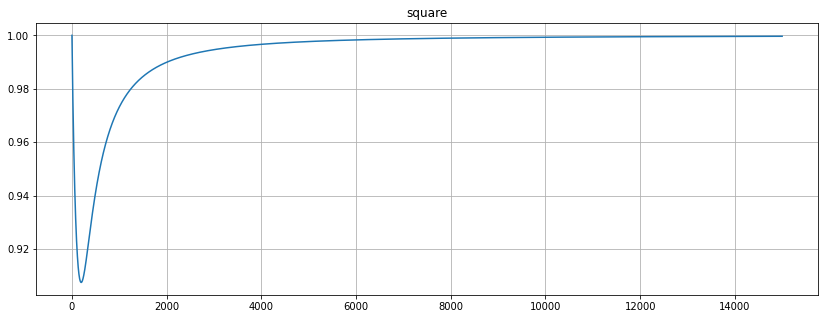

In [766]:
plt.figure(figsize=(14,5))

plt.plot(P_out_sList/total)
plt.title("square")
plt.grid()

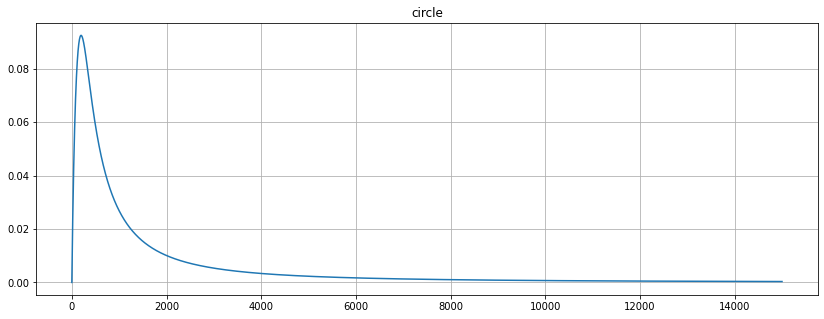

In [767]:
plt.figure(figsize=(14,5))

plt.plot(P_out_cList/total)
plt.title("circle")
plt.grid()

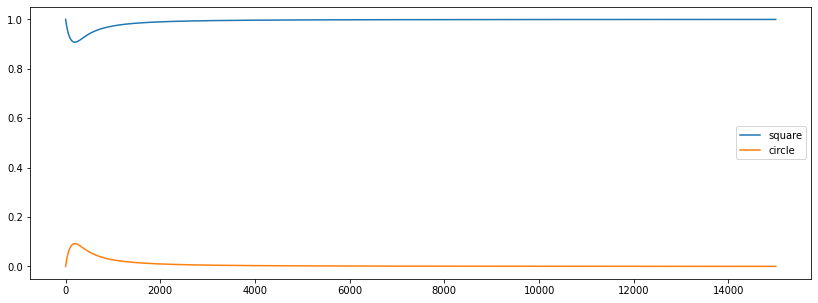

In [768]:
plt.figure(figsize=(14,5))

plt.plot(P_out_sList/total, label='square')
plt.plot(P_out_cList/total, label='circle')
plt.grid()
plt.grid()
plt.legend()

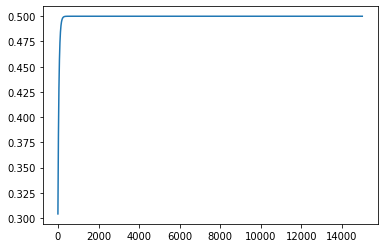

In [770]:
plt.plot(P_freeList)

## Corrected model

In [876]:

def run(p,q,N_recp_total, const, tau, gamma, N_circle_in, N_recp_free, N_circle_out, N_square_out, alpha, beta):

    N_circle_in_list = []
    N_recp_free_list = []
    N_circle_out_list = []
    N_square_out_list = []
    alpha_list = []
    beta_list = []

    N_circle_in_aux = N_circle_in
    N_recp_free_aux = N_recp_free
    N_circle_out_aux = N_circle_out
    N_square_out_aux = N_square_out
    alpha_aux = alpha
    beta_aux = beta

    dt = 0.05
    steps = 10000

    for i in range(steps):
        N_circle_in_aux += (const - alpha - gamma)*dt
        N_recp_free_aux += (-N_recp_free*p + (N_recp_total-N_recp_free)*q)*dt
        alpha_aux += (N_recp_free/N_recp_total * p)*dt
        beta_aux += ((-N_recp_free + N_recp_total)/N_recp_total * q)*dt
        N_circle_out_aux += (gamma)*dt
        N_square_out_aux += (beta)*dt


        N_circle_in = N_circle_in_aux
        N_recp_free = N_recp_free_aux
        N_circle_out = N_circle_out_aux
        N_square_out = N_square_out_aux
        alpha = alpha_aux
        beta = beta_aux

        N_circle_in_list.append(N_circle_in)
        N_recp_free_list.append(N_recp_free)
        N_circle_out_list.append(N_circle_out)
        N_square_out_list.append(N_square_out)
        alpha_list.append(alpha)
        beta_list.append(beta)
        
    return N_square_out_list, N_circle_out_list


In [877]:
p = 0.5
q = 0.2
N_recp_total = 100
const  = 1
tau = 0.5
gamma = 1/tau

N_circle_in = 0
N_recp_free = N_recp_total/2
N_circle_out = 0
N_square_out = 0
alpha = 0
beta = 0

N_square_out_list, N_circle_out_list = run(p,q,N_recp_total, const, tau, gamma, N_circle_in, N_recp_free, N_circle_out, N_square_out, alpha, beta)


In [878]:
N_square_out_list = np.array(N_square_out_list)
N_circle_out_list = np.array(N_circle_out_list)
total = (N_square_out_list + N_circle_out_list)*1  + 1

Text(0.5, 1.0, 'circle')

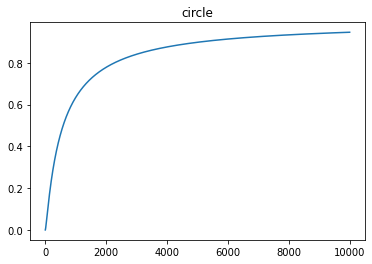

In [879]:
plt.plot(N_square_out_list/total)
plt.title("circle")

Text(0.5, 1.0, 'square')

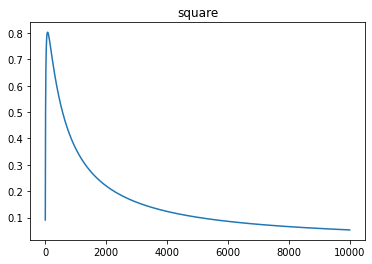

In [880]:
plt.plot(N_circle_out_list/total)
plt.title("square")

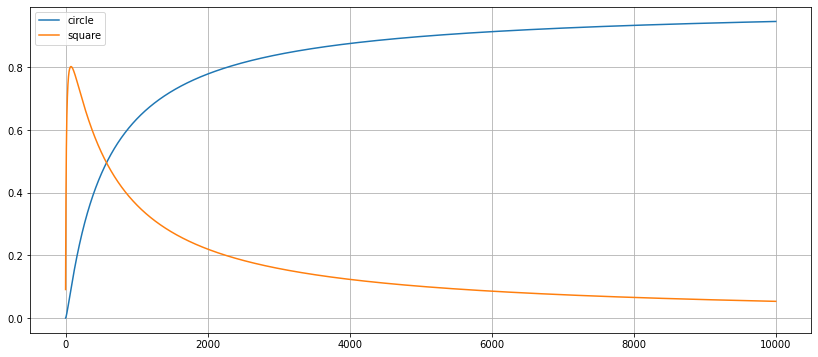

In [881]:
plt.figure(figsize=(14,6))
plt.plot(N_square_out_list/total, label = "circle")
plt.plot(N_circle_out_list/total, label = "square")
plt.legend()
plt.grid()